In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [4]:
df=pd.read_csv("data-export (1).csv")

In [5]:
df.head()


,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044


In [11]:
df.columns=df.iloc[0]
df=df.drop(index=0).reset_index(drop=True)
df.columns=["Channel group","DateHour","Users","Sessions","Engaged Sessions","Average engagement time per session","Engaged sessions per user","Events per session","Engagement rate","Event count"]

In [12]:
df.head()


,Channel group,DateHour,Users,Sessions,Engaged Sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
1,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
2,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
3,Organic Social,2024041720,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001
4,Organic Social,2024041721,160,206,103,59.31553398058250,0.64375,4.694174757281550,0.5,967


In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3181 entries, 0 to 3180
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Channel group                        3181 non-null   object
 1   DateHour                             3181 non-null   object
 2   Users                                3181 non-null   object
 3   Sessions                             3181 non-null   object
 4   Engaged Sessions                     3181 non-null   object
 5   Average engagement time per session  3181 non-null   object
 6   Engaged sessions per user            3181 non-null   object
 7   Events per session                   3181 non-null   object
 8   Engagement rate                      3181 non-null   object
 9   Event count                          3181 non-null   object
dtypes: object(10)
memory usage: 248.6+ KB


In [22]:
df["DateHour"]=pd.to_datetime(df["DateHour"],format="%Y%m%d%H", errors='coerce')
numeric_cols=df.columns.drop(["Channel group","DateHour"])
df[numeric_cols]=df[numeric_cols].apply(pd.to_numeric, errors='coerce')
df["Hour"]=df["DateHour"].dt.hour


In [24]:
df.head()

,Channel group,DateHour,Users,Sessions,Engaged Sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
0,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
1,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
2,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
3,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20
4,Organic Social,2024-04-17 21:00:00,160,206,103,59.315534,0.643750,4.694175,0.500000,967,21


In [25]:
df.describe()

,DateHour,Users,Sessions,Engaged Sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
count,3181,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000
mean,2024-04-20 01:18:31.348632576,41.874568,51.114429,28.289217,66.650591,0.606449,4.675970,0.503404,241.907891,11.803521
min,2024-04-06 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,2024-04-13 02:00:00,20.000000,24.000000,13.000000,32.097378,0.561404,3.750000,0.442857,103.000000,6.000000
50%,2024-04-20 02:00:00,42.000000,51.000000,27.000000,49.040404,0.666667,4.410256,0.545455,226.000000,12.000000
75%,2024-04-26 22:00:00,60.000000,71.000000,41.000000,71.500000,0.750000,5.218182,0.633333,339.000000,18.000000
max,2024-05-03 23:00:00,208.000000,267.000000,132.000000,4525.000000,2.000000,56.000000,1.000000,1147.000000,23.000000
std,NaN,29.383942,36.661139,20.551668,127.220206,0.264064,2.795667,0.228241,183.318978,6.884907


# Sessions and user Over Time

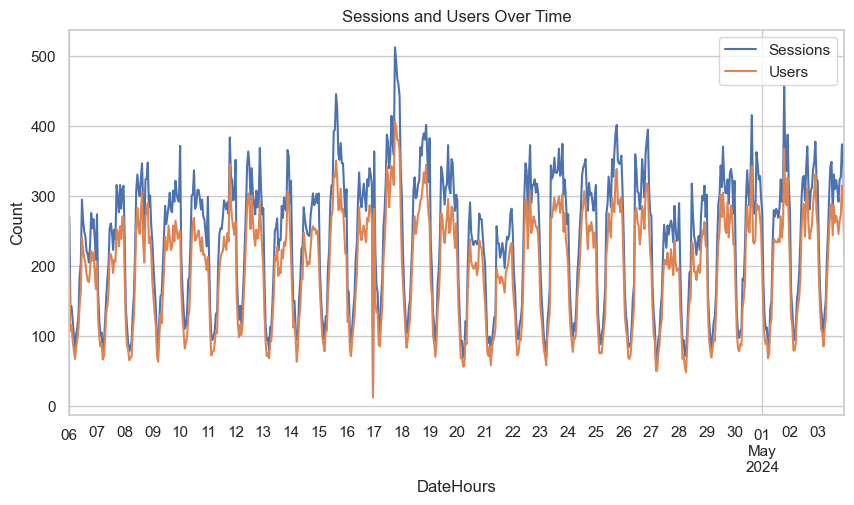

In [41]:
sbn.set(style="whitegrid")
plt.figure(figsize=(10,5))
df.groupby("DateHour")[["Sessions","Users"]].sum().plot(ax=plt.gca())
plt.title("Sessions and Users Over Time")
plt.xlabel("DateHours")
plt.ylabel("Count")
plt.show()


# Total Users By Channels

C:\Users\sr844\AppData\Local\Temp\ipykernel_19712\1683744754.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sbn.barplot(data=df,x="Channel group", y="Users",estimator=np.sum,palette="viridis")


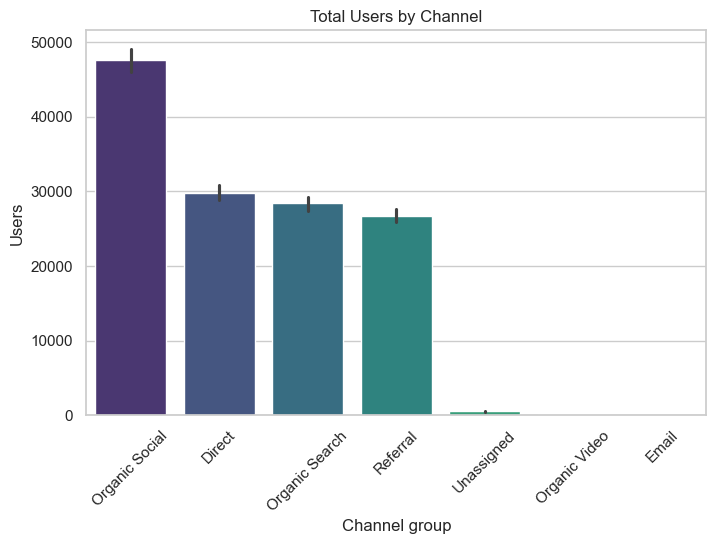

In [49]:
plt.figure(figsize=(8,5))
sbn.barplot(data=df,x="Channel group", y="Users",estimator=np.sum,palette="viridis")
plt.title("Total Users by Channel")
plt.xticks(rotation=45)
plt.show()

In [45]:
df.head()


,Channel group,DateHour,Users,Sessions,Engaged Sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
0,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
1,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
2,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
3,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20
4,Organic Social,2024-04-17 21:00:00,160,206,103,59.315534,0.643750,4.694175,0.500000,967,21


# Average engagement Time By Channel

C:\Users\sr844\AppData\Local\Temp\ipykernel_19712\2029417884.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sbn.barplot(data=df,x="Channel group", y="Average engagement time per session",estimator=np.mean,palette="magma")


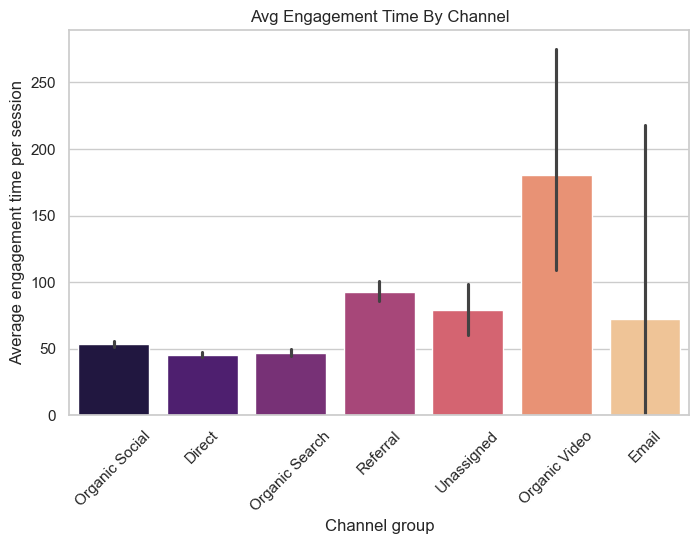

In [52]:
plt.figure(figsize=(8,5))
sbn.barplot(data=df,x="Channel group", y="Average engagement time per session",estimator=np.mean,palette="magma")
plt.title("Avg Engagement Time By Channel")
plt.xticks(rotation=45)
plt.show()

In [53]:
df.head()


,Channel group,DateHour,Users,Sessions,Engaged Sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
0,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
1,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
2,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
3,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20
4,Organic Social,2024-04-17 21:00:00,160,206,103,59.315534,0.643750,4.694175,0.500000,967,21


# Engagement Session Rate Distribution BY Channels 

C:\Users\sr844\AppData\Local\Temp\ipykernel_19712\385160953.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sbn.boxplot(data=df,x="Channel group", y="Engagement rate",palette="coolwarm")


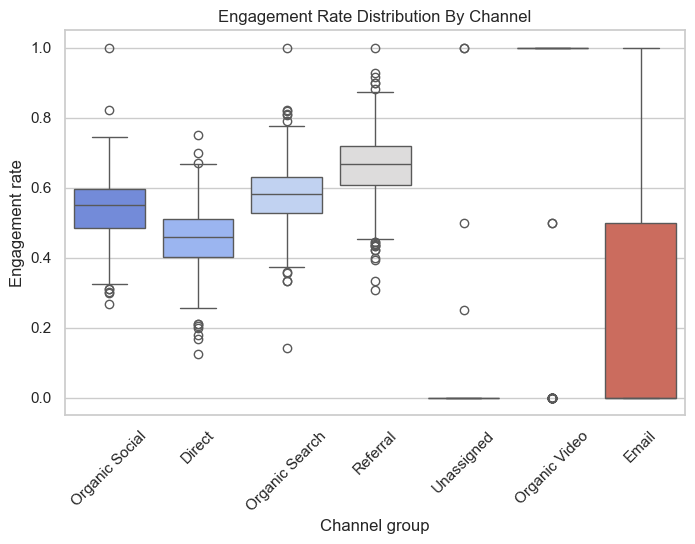

In [56]:
plt.figure(figsize=(8,5))
sbn.boxplot(data=df,x="Channel group", y="Engagement rate",palette="coolwarm")
plt.title("Engagement Rate Distribution By Channel")
plt.xticks(rotation=45)
plt.show()

# Engaged VS Non Engaged Sessions

In [57]:
df.head()


,Channel group,DateHour,Users,Sessions,Engaged Sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
0,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
1,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
2,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
3,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20
4,Organic Social,2024-04-17 21:00:00,160,206,103,59.315534,0.643750,4.694175,0.500000,967,21


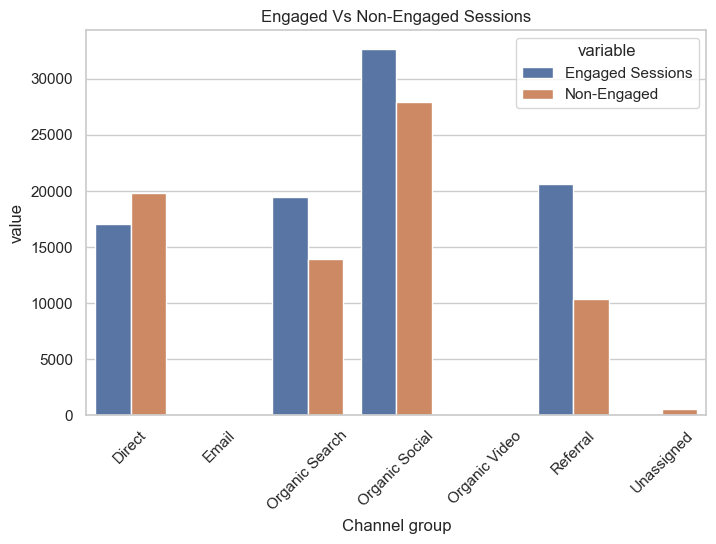

In [60]:
session_df=df.groupby("Channel group")[["Sessions","Engaged Sessions"]].sum().reset_index()
session_df["Non-Engaged"]=session_df["Sessions"]-session_df["Engaged Sessions"]
session_df_melted=session_df.melt(id_vars="Channel group",value_vars=["Engaged Sessions","Non-Engaged"])

plt.figure(figsize=(8,5))
sbn.barplot(data=session_df_melted,x="Channel group", y="value",hue="variable")
plt.title("Engaged Vs Non-Engaged Sessions")
plt.xticks(rotation=45)
plt.show()


# Traffic By Hour and Channels

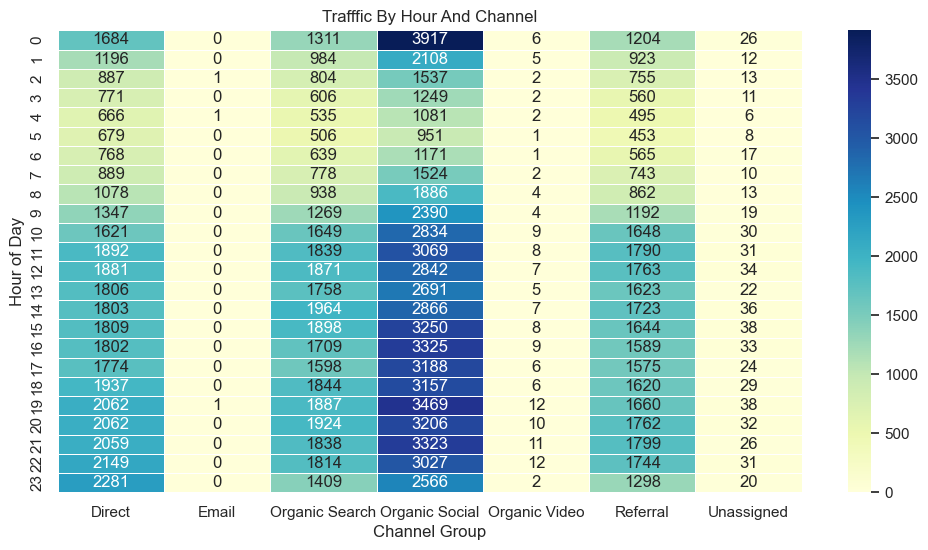

In [64]:
heatmap_data=df.groupby(["Hour","Channel group"])["Sessions"].sum().unstack().fillna(0)

plt.figure(figsize=(12,6))
sbn.heatmap(heatmap_data,cmap="YlGnBu",linewidth=.5,annot=True,fmt=".0f")
plt.title("Trafffic By Hour And Channel")
plt.xlabel("Channel Group")
plt.ylabel("Hour of Day")
plt.show()

# Engagement Rate Vs Session Over Time

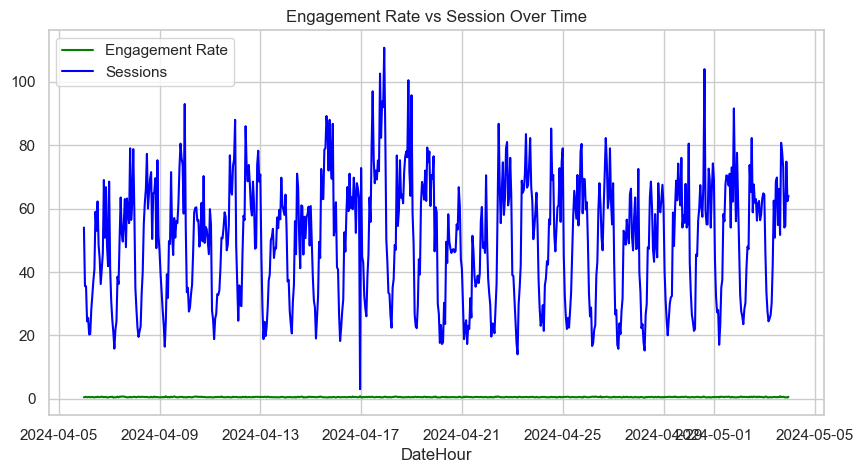

In [68]:
df_plot=df.groupby("DateHour")[["Engagement rate", "Sessions"]].mean().reset_index()

plt.figure(figsize=(10,5))
plt.plot(df_plot["DateHour"],df_plot["Engagement rate"],label="Engagement Rate",color="green")
plt.plot(df_plot["DateHour"],df_plot["Sessions"],label="Sessions",color="blue")
plt.title("Engagement Rate vs Session Over Time")
plt.xlabel("DateHour")
plt.legend()
plt.grid(True)
plt.show()

